## Task 2: Quantitative Analysis

In [ ]:
#  1. Imports and Setup 
import sys, os
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

%load_ext autoreload
%autoreload 2

# Import the analysis classes  
from src.stock_loader import StockDataset
from src.fa.technical_analyzer import TechnicalAnalyzer
from IPython.display import Image, display

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
# --- CHOOSE YOUR STOCK & TIME PERIOD ---
TICKER = 'MSFT' # Example: Microsoft

# 2. Data Loading
stock_loader = StockDataset(ticker=TICKER)
try:
    stock_df = stock_loader.load()
except FileNotFoundError as e:
    print(f"ERROR: {e}")
    sys.exit()

✅ Loaded MSFT: 3774 rows, 2009-01-02 → 2023-12-29


In [9]:
print("Actual stock data columns:", list(stock_df.columns))

Actual stock data columns: ['OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME']


In [10]:
# 3. Initialize Analyzer and Calculate Indicators
analyzer = TechnicalAnalyzer(df=stock_df, ticker=TICKER)
indicator_df = analyzer.calculate_indicators()

print("\n--- Technical Indicators (Last 5 days) ---")
# [Image of technical indicators chart]

print(indicator_df[['Close', 'SMA_50', 'EMA_20', 'RSI', 'MACD']].tail())

✅ Technical Analyzer initialized for MSFT.
✅ Technical indicators calculated.

--- Technical Indicators (Last 5 days) ---
                 Close      SMA_50      EMA_20        RSI      MACD
Date                                                               
2023-12-22  369.767883  355.078464  366.580145  56.363342  2.805416
2023-12-26  369.846832  356.018111  366.891259  56.447998  2.767033
2023-12-27  369.264465  356.849368  367.117278  55.591261  2.658971
2023-12-28  370.458862  357.715942  367.435524  57.031664  2.639285
2023-12-29  371.209198  358.635943  367.794922  57.954296  2.653640


In [11]:
# 4. Use PyNance for Financial Metrics
metrics = analyzer.get_pynance_metrics()
print("\n--- Financial Metrics ---")
print(metrics)


--- Financial Metrics ---
{'Ticker': 'MSFT', 'Annualized Return (PyNance-style)': '23.96%', 'Annualized Volatility (PyNance-style)': '26.80%', 'Max Drawdown (PyNance-style)': '-40.61%', 'Avg Daily Volume': '38,957,536'}


In [12]:
# 5. Visualize the Data
plot_filename = f"{TICKER}_technical_analysis.png"
analyzer.plot_indicators(save_name=plot_filename)

✅ Plot saved: reports/indicators/MSFT_technical_analysis.png



--- Visualization for MSFT ---


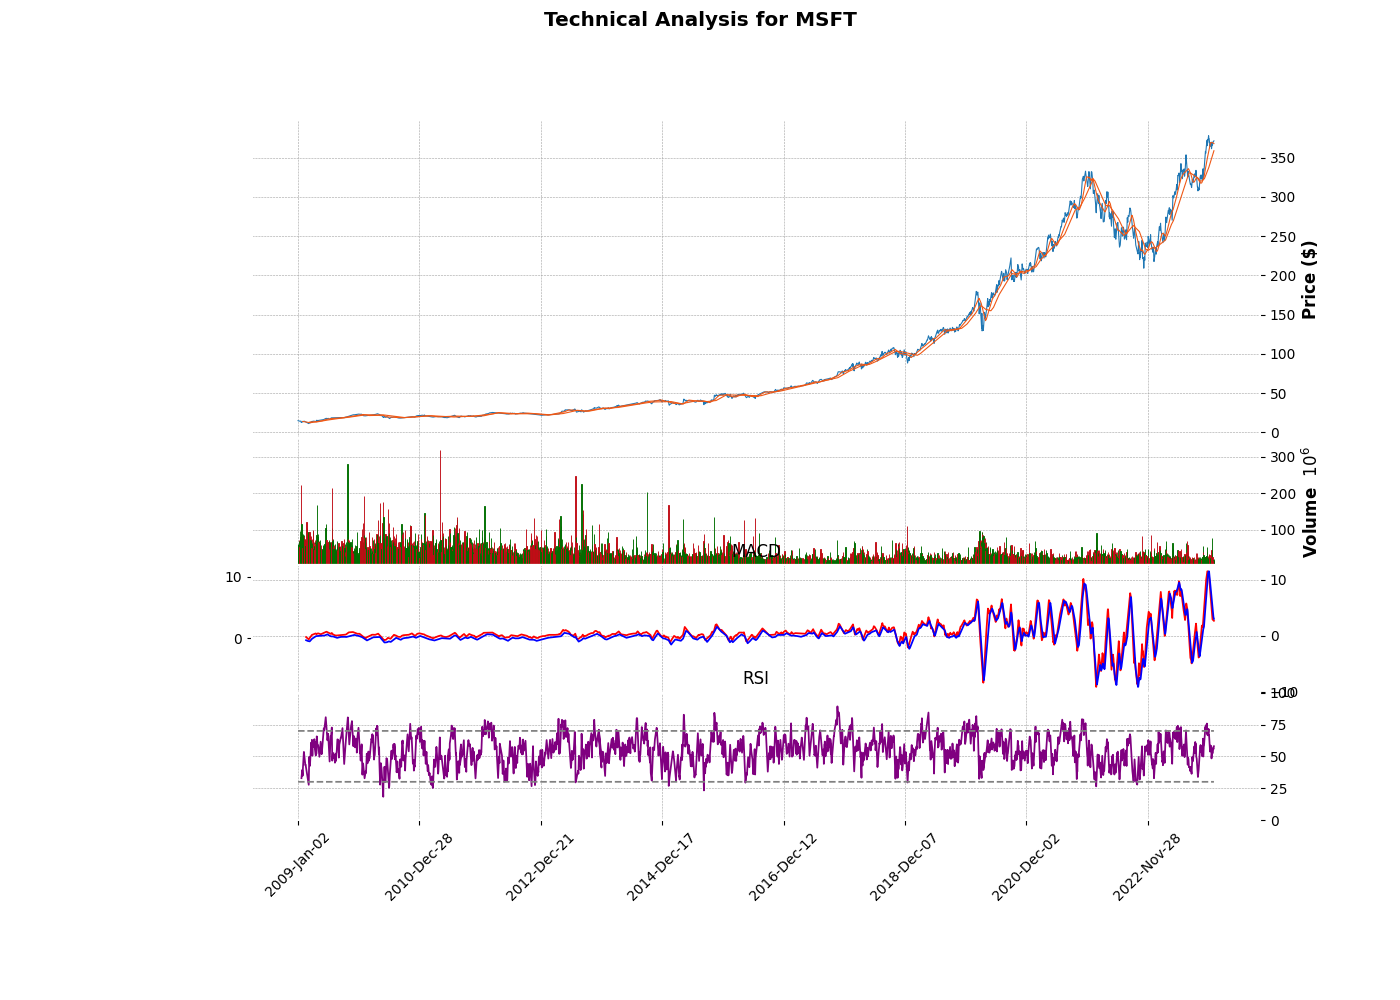

In [13]:
# 6. Display the Plot
print(f"\n--- Visualization for {TICKER} ---")
display(Image(filename=f"reports/indicators/{plot_filename}"))